<a href="https://colab.research.google.com/github/Lcns99/Algoritmos-de-ML/blob/main/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [5]:
#Criando a rotina para utilizar o iris dataset
iris = datasets.load_iris()

#Criando o df iris
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
#transformando os dados em array
entrada = df_iris.iloc[:, :-1].values
target = df_iris.iloc[:,4]

#realizando a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split # função que divide o dataset
x_train, x_test, y_train, y_test = train_test_split(entrada, target, test_size= 0.20) #20% teste

In [3]:
from sklearn.neural_network import MLPClassifier

#definindo a classificação da rede
clf = MLPClassifier(solver= 'lbfgs', alpha= 1e-5, hidden_layer_sizes=(5, 5), random_state= 1) #rede com 2 camadas escondidas com 5 neurônios cada

In [7]:
#Treinando o modelo
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
#Realizando a previsão
y_pred = clf.predict(x_test)
y_pred

array([2., 2., 1., 1., 2., 0., 2., 1., 1., 0., 2., 0., 2., 2., 0., 2., 0.,
       0., 1., 1., 0., 0., 2., 2., 1., 0., 2., 1., 2., 2.])

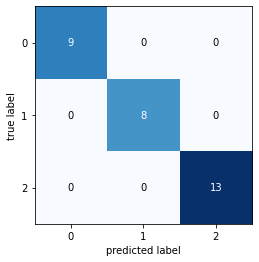

In [14]:
#Avaliando o modelo

from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat= matriz_confusao)